# 2D planning with three obstacles - MPC

## Problem definition

In [71]:
include("ex8_data_mpc.jl");

## Load tools

In [72]:
@load_file "pipg_suite.jl" true
@load_file "pipg_var.jl" true
@load_file "mpc_utils.jl" true
@load_file "ex8_plotting.jl" false;

## Run MPC

In [73]:
timeit_var = mpc_utils.execute_mpc!(:warm_feas,true);

                                 ..:: MPC Simulation ::..
-------------------------------------------------------------------------------------------
  Solve Instant  |   Dyn. Err.   |  Rel. Dist. to Opt. |   Solve Time (ms)  |  JuMP Status  
-------------------------------------------------------------------------------------------
        1        |  1.341785e-04 |      1.732e-03      |      5.06e+00      |   OPTIMAL
        2        |  4.168117e-04 |      4.349e-04      |      5.91e+00      |   OPTIMAL
        3        |  3.337164e-04 |      1.144e-03      |      4.93e+00      |   OPTIMAL
        4        |  3.721834e-04 |      6.742e-04      |      5.15e+00      |   OPTIMAL
        5        |  3.043623e-04 |      7.555e-04      |      6.47e+00      |   OPTIMAL
        6        |  3.145220e-04 |      7.317e-04      |      4.89e+00      |   OPTIMAL
        7        |  2.960556e-04 |      6.733e-04      |      4.70e+00      |   OPTIMAL
        8        |  2.989436e-04 |      6.277e-04

## Visualization

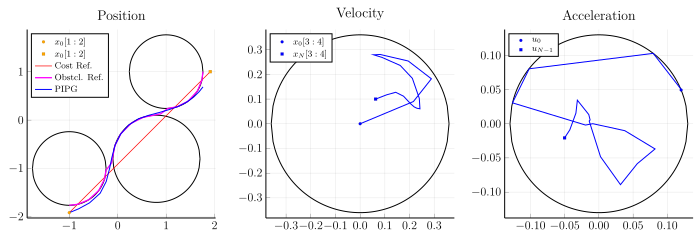

In [74]:
plotter.trajectory2D(mpc_utils.xmpc,mpc_utils.umpc[1:end-1],1,eX.yy_unscl[1:eX.N])

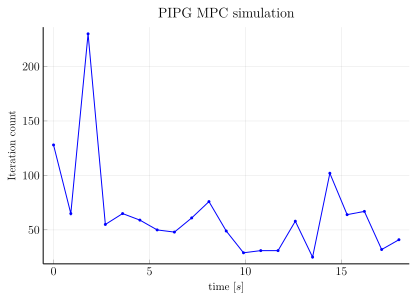

In [76]:
mpc_utils.plot_iter_count()

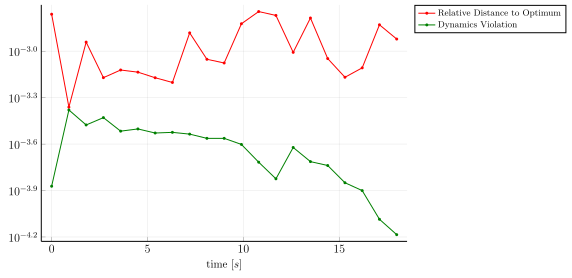

In [77]:
mpc_utils.plot_rd2o_dye()

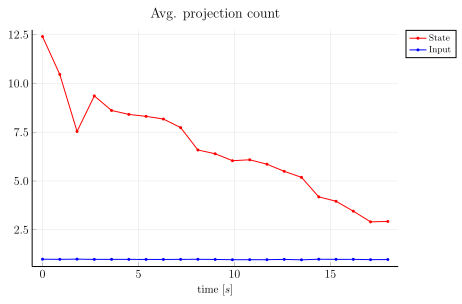

In [78]:
mpc_utils.plot_cum_proj()

## Benchmark MPC

In [79]:
show(timeit_var)

 ────────────────────────────────────────────────────────────────────────────
                                     Time                   Allocations      
                             ──────────────────────   ───────────────────────
      Tot / % measured:           9.18s / 7.20%            527MiB / 23.2%    

 Section             ncalls     time   %tot     avg     alloc   %tot      avg
 ────────────────────────────────────────────────────────────────────────────
 JuMP                    21    634ms  95.9%  30.2ms    107MiB  87.0%  5.08MiB
 PIPG (diagnostic)       21   27.0ms  4.09%  1.29ms   15.9MiB  13.0%   774KiB
 Warm-start PIPG         21   30.1μs  0.00%  1.43μs   2.30KiB  0.00%     112B
 Power iteration          1   11.0μs  0.00%  11.0μs     0.00B  0.00%    0.00B
 ────────────────────────────────────────────────────────────────────────────